## Napisać symulację procesu kolejkowego M/M/1 (najlepiej od razu przypadek ogólny dla M/M/k/c)dla parametrów λA=1/(20min)  i λs=1/(15min).

### Proszę zbadać zależność następujących wielkości:

* 13.E(x) , gdzie x– całkowita liczba zdarzeń w systemie
* 14.E(R), gdzie R – całkowity czas spędzony w systemie
* 15.E(xw), gdzie xw– liczba zadań w kolejce 

##### od parametrów procesu λA i λs oraz ich zbieżność w czasie.

In [1]:
# %pwd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from ex3.estimator import Estimator
from ex3.events import Events


In [3]:
random_seed = 123
rng = np.random.RandomState(seed=random_seed)

In [4]:
def generate_exponential(lmbda, title, size=1000, v=True, bins_scaler=200 ):
    time_exponential = rng.exponential(1./lmbda, size=size)
    if v:
        plt.hist(time_exponential,bins=int(size/bins_scaler))
        plt.title(title + " - sampled data")
        plt.show()
        # E(X) = 1/lmbda
        E_X = time_exponential.mean()
        print("estimated E_X = {}".format(E_X))
        print("thoeretical E_X = {}".format(1/lmbda))
    return time_exponential

In [5]:
# Wykladniczy rozklad czasu pomiedzy kolejny zgloszeniami do systemu
# lmbda * exp(-lmbda)
lmbda_a = 1./20. #min^-1
# Wykladniczy rozklad czasu obslugi pojedynczego zgloszenia
# lmbda * exp(-lmbda)
lmbda_s = 1./15. #min^-1
dataset_size = 10000

t_arrival = generate_exponential(lmbda_a, "arrival times", size=dataset_size, v=False)
t_service = generate_exponential(lmbda_s, "service times", size=dataset_size, v=False)

In [6]:
events = Events()
for idx, arrive in enumerate(t_arrival):
    events.add_event(arrive, t_service[idx])

events.prepare_total_marked()
events.calc_tasks_in_sys()

events.calc_time_in_sys()
# R - time in system
R = events.time_in_sys

events.prepare_queue()
events.calc_queue()
x_w = events.task_queue

In [19]:
xx = []
RR = []
xww = []
lmbdas = [(1./20., 1./15.), (1./20., 1./18.), (1./20., 1./20.), (1./20., 1./23.)]
dataset_size = 10000
    
for lmbd in lmbdas:


    t_arrival = generate_exponential(lmbd[0], "arrival times", size=dataset_size, v=False)
    t_service = generate_exponential(lmbd[1], "service times", size=dataset_size, v=False)
    events = Events()
    for idx, arrive in enumerate(t_arrival):
        events.add_event(arrive, t_service[idx])

    events.prepare_total_marked()
    events.calc_tasks_in_sys()

    events.calc_time_in_sys()
    # R - time in system
    R = events.time_in_sys

    events.prepare_queue()
    events.calc_queue()
    
    x_w = events.task_queue
    
    xx.append(Estimator.estimate_x(events.t_marked[:,0], events.tasks_in_sys))
    RR.append(Estimator.estimate_R(R))
    xww.append(Estimator.estimate_xw(events.t_queue[:,0], x_w))

/home/karol/Desktop/inf/ms/metody_statystyczne/notebooks/ex3/estimator.py:28: RuntimeWarning: invalid value encountered in double_scalars
  estimated[idx] = sum(mults[:idx]) / t_marked_0_col[idx]
/home/karol/Desktop/inf/ms/metody_statystyczne/notebooks/ex3/estimator.py:72: RuntimeWarning: invalid value encountered in double_scalars
  estimated[idx] = sum(mults[:idx]) / t_queue_0_col[idx]


### Zbieżność w czasie dla zakładanych parametrów

###### λA=1/(20min) i λs=1/(15min),

###### λA=1/(20min) i λs=1/(18min),

###### λA=1/(20min) i λs=1/(20min),

###### λA=1/(20min) i λs=1/(23min) 

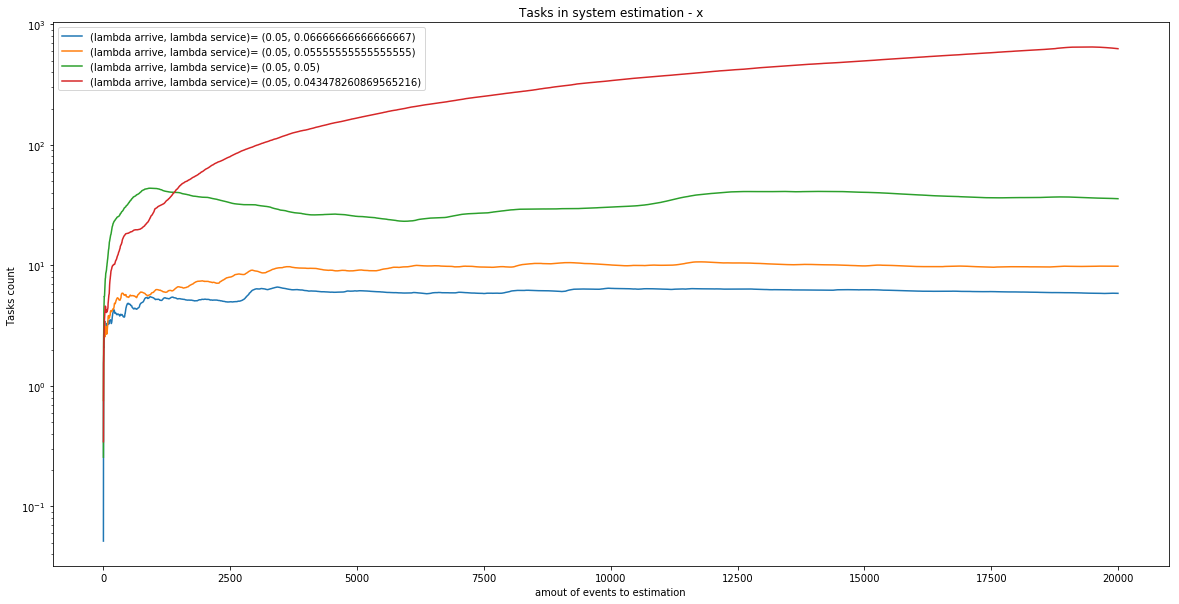

In [28]:
legend = []
plt.figure(figsize=(20,10))
for idx, x in enumerate(xx):
    plt.plot(range(len(x)), x)
    legend.append("(lambda arrive, lambda service)= "+str(lmbdas[idx]))
plt.title("Tasks in system estimation - x")
plt.semilogy()
plt.xlabel("amout of events to estimation")
plt.ylabel("Tasks count ")
plt.legend(legend)
plt.show()

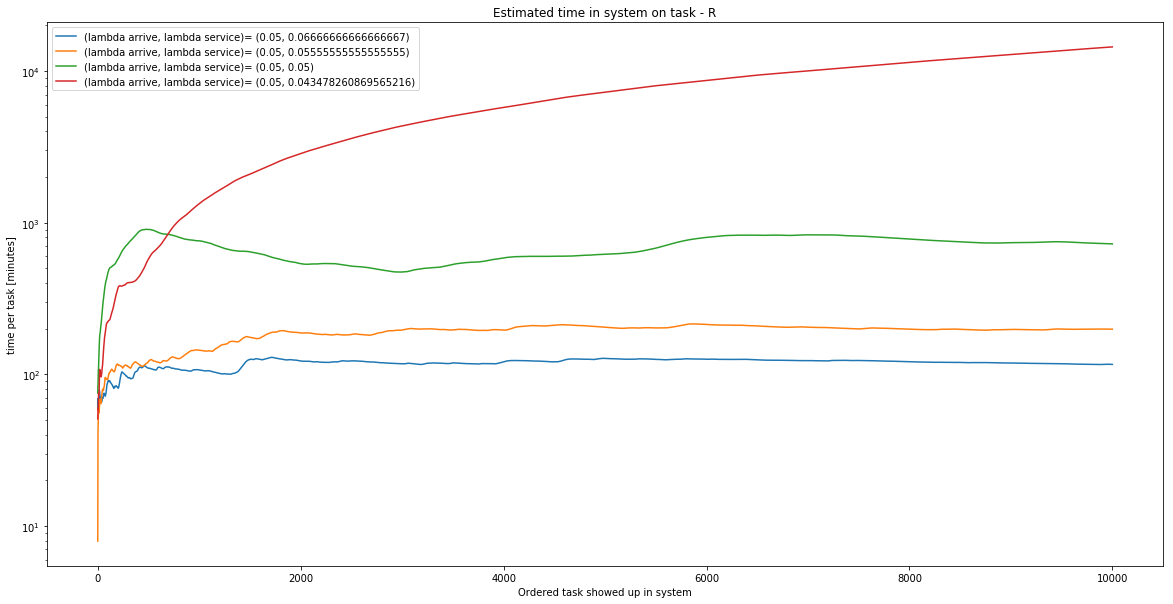

In [29]:
legend = []
plt.figure(figsize=(20,10))
for idx, r in enumerate(RR):
    plt.plot(range(len(r)), r)
    legend.append("(lambda arrive, lambda service)= "+str(lmbdas[idx]))
plt.title("Estimated time in system on task - R")
plt.semilogy()
plt.xlabel("Ordered task showed up in system")
plt.ylabel("time per task [minutes]")
plt.legend(legend)
plt.show()

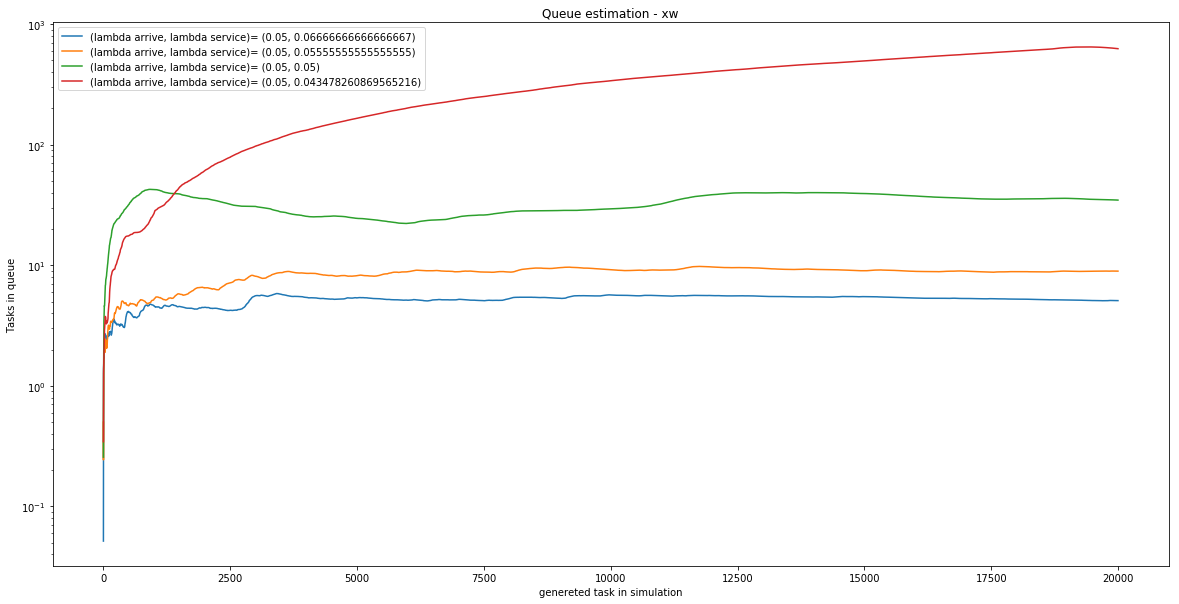

In [27]:
legend = []
plt.figure(figsize=(20,10))
for idx, xw in enumerate(xww):
    plt.plot(range(len(xw)), xw)
    legend.append("(lambda arrive, lambda service)= "+str(lmbdas[idx]))
plt.semilogy()
plt.title("Queue estimation - xw")
plt.xlabel("genereted task in simulation")
plt.ylabel("Tasks in queue")
plt.legend(legend)
plt.show()



In [39]:
est_x = [xx[0][-1], xx[1][-1], xx[2][-1], xx[3][-1]]
est_R = [RR[0][-1], RR[1][-1], RR[2][-1], RR[3][-1]]
est_xw = [xww[0][-1], xww[1][-1], xww[2][-1], xww[3][-1]]
print("Zadań w systemie {}".format( est_x))
print("Czas w systemie {}".format( est_R))
print("Zadan w kolejce {}".format( est_xw))


Zadań w systemie [5.855469355878318, 9.827105945749269, 35.70181668060374, 626.9535220335661]
Czas w systemie [116.20332254459649, 198.38824202117982, 724.3060803170124, 14421.052387450904]
Zadan w kolejce [5.090716431093664, 8.941068524227743, 34.716799961695706, 626.0569080848713]
